<a href="https://colab.research.google.com/github/Zaulao/BezierCurves/blob/master/notebook/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando todos os *Datasets*

In [46]:
import numpy as np
import pandas as pd

cities_coordinates = pd.read_csv("https://media.githubusercontent.com/media/Lucas-CardosoO/DataScience-Project/main/Covid%20Dataset/brazil_cities_coordinates.csv?token=AG7ZW2PEWKZEDZQR4VOVDC3A4IJLK",encoding = "UTF-8")
cases_by_state = pd.read_csv("https://media.githubusercontent.com/media/Lucas-CardosoO/DataScience-Project/main/Covid%20Dataset/brazil_covid19.csv?token=AG7ZW2MOTNYDVKOYZRJYOSTA4ILGY",encoding = "UTF-8")
cases_by_cities = pd.read_csv("https://media.githubusercontent.com/media/Lucas-CardosoO/DataScience-Project/main/Covid%20Dataset/brazil_covid19_cities.csv?token=AG7ZW2NVOZDWRC524FOZLM3A4ILQE", encoding='UTF-8')
cases_macro = pd.read_csv("https://media.githubusercontent.com/media/Lucas-CardosoO/DataScience-Project/main/Covid%20Dataset/brazil_covid19_macro.csv?token=AG7ZW2LHZ22PCZYRIGJEZDDA4IMGG", encoding='UTF-8')
population_by_city = pd.read_csv("https://raw.githubusercontent.com/Lucas-CardosoO/DataScience-Project/main/Covid%20Dataset/brazil_population_2019.csv?token=AG7ZW2LOEFD7V62LPVG6WOTA5NFDI", encoding='UTF-8')

print("Cities Coordinates size: " + str(len(cities_coordinates)))
print(cities_coordinates.head())
print("------------------------------------------------------------------------" + '\n')

print("Cases by State size: " + str(len(cases_by_state)))
print(cases_by_state.head())
print("------------------------------------------------------------------------" + '\n')

print("Cases by Cities size: " + str(len(cases_by_cities)))
print(cases_by_cities.head())
print("------------------------------------------------------------------------" + '\n')

print("Cases Macro size: " + str(len(cases_macro)))
print(cases_macro.head())
print("------------------------------------------------------------------------" + '\n')

print("Population by City size: " + str(len(population_by_city)))
print(population_by_city.head())
print("------------------------------------------------------------------------" + '\n')



HTTPError: ignored

# Checando possíveis duplicados nos *Datasets*

In [22]:
cities_coordinates[cities_coordinates.duplicated()].head()

,state_code,city_code,city_name,lat,long,capital


In [23]:
cases_by_state[cases_by_state.duplicated()].head()

,date,region,state,cases,deaths


In [24]:
cases_by_cities[cases_by_cities.duplicated()].head()

,date,state,name,code,cases,deaths


In [25]:
cases_macro[cases_macro.duplicated()].head()

,date,country,week,cases,deaths,recovered,monitoring


In [26]:
population_by_city[population_by_city.duplicated()].head()

,region,state,city,state_code,city_code,health_region_code,health_region,population


**There is no duplicated data :)**

# Checando *Outliers* no *dataset* de Populações de cidades

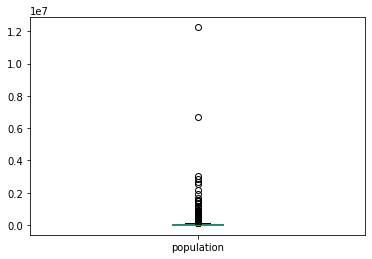

In [27]:
population_by_city['population'].plot.box()

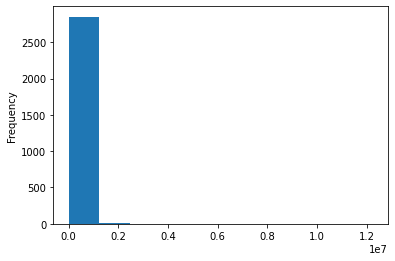

In [31]:
population_by_city['population'].plot.hist()

In [32]:
population_by_city.sort_values('population')

,region,state,city,state_code,city_code,health_region_code,health_region,population
79,Centro-Oeste,Goiás,Anhanguera,52,520120,52005,Estrada de Ferro,1149
2344,Sudeste,São Paulo,Uru,35,355590,35065,Lins,1165
1771,Sudeste,Minas Gerais,Senador José Bento,31,316580,31057,Pouso Alegre,1502
2600,Sul,Santa Catarina,Paial,42,421187,42002,Oeste,1505
2447,Sul,Paraná,Nova Aliança do Ivaí,41,411650,41014,14ª RS Paranavaí,1543
...,...,...,...,...,...,...,...,...
455,Nordeste,Ceará,Fortaleza,23,230440,23001,1ª Região Fortaleza,2669342
1187,Nordeste,Bahia,Salvador,29,292740,29020,Salvador,2872347
148,Centro-Oeste,Distrito Federal,Brasília,53,530010,53001,Brasília,3015268
1922,Sudeste,Rio de Janeiro,Rio de Janeiro,33,330455,33005,Metropolitana I,6718903


O dataset tem o comportamento esperado de populações do Brasil, pois são muitas cidades com uma população mais baixa e pouquíssimas cidades com uma população muito grande, apenas São Paulo e Rio de Janeiro. Mesmo que estas cidades tenham comportamento de outliers, não são tratados desta forma por serem dados legítimos.

In [45]:
population_except_sp_and_rj = population_by_city.drop([1922, 2297])
population_except_sp_and_rj['population'].plot.box()

,region,state,city,state_code,city_code,health_region_code,health_region,population
79,Centro-Oeste,Goiás,Anhanguera,52,520120,52005,Estrada de Ferro,1149
2344,Sudeste,São Paulo,Uru,35,355590,35065,Lins,1165
1771,Sudeste,Minas Gerais,Senador José Bento,31,316580,31057,Pouso Alegre,1502
2600,Sul,Santa Catarina,Paial,42,421187,42002,Oeste,1505
2447,Sul,Paraná,Nova Aliança do Ivaí,41,411650,41014,14ª RS Paranavaí,1543
...,...,...,...,...,...,...,...,...
1307,Norte,Amazonas,Manaus,13,130260,13001,Manaus Entorno e Alto Rio Negro,2182763
1561,Sudeste,Minas Gerais,Belo Horizonte,31,310620,31008,Belo Horizonte Nova Lima Caeté,2512070
455,Nordeste,Ceará,Fortaleza,23,230440,23001,1ª Região Fortaleza,2669342
1187,Nordeste,Bahia,Salvador,29,292740,29020,Salvador,2872347
